In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from numpy.linalg import norm
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.cluster import KMeans
from itertools import permutations, combinations


In [9]:
trueData = pd.read_csv('../../dataset/processed.csv', infer_datetime_format = True, parse_dates = ['DateTime'], index_col = ['DateTime'])
trueData.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,
2006-12-16 17:24:00,2.965329,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,4.050626,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,4.063907,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,4.077189,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,2.443552,0.528,235.68,15.8,0.0,1.0,17.0


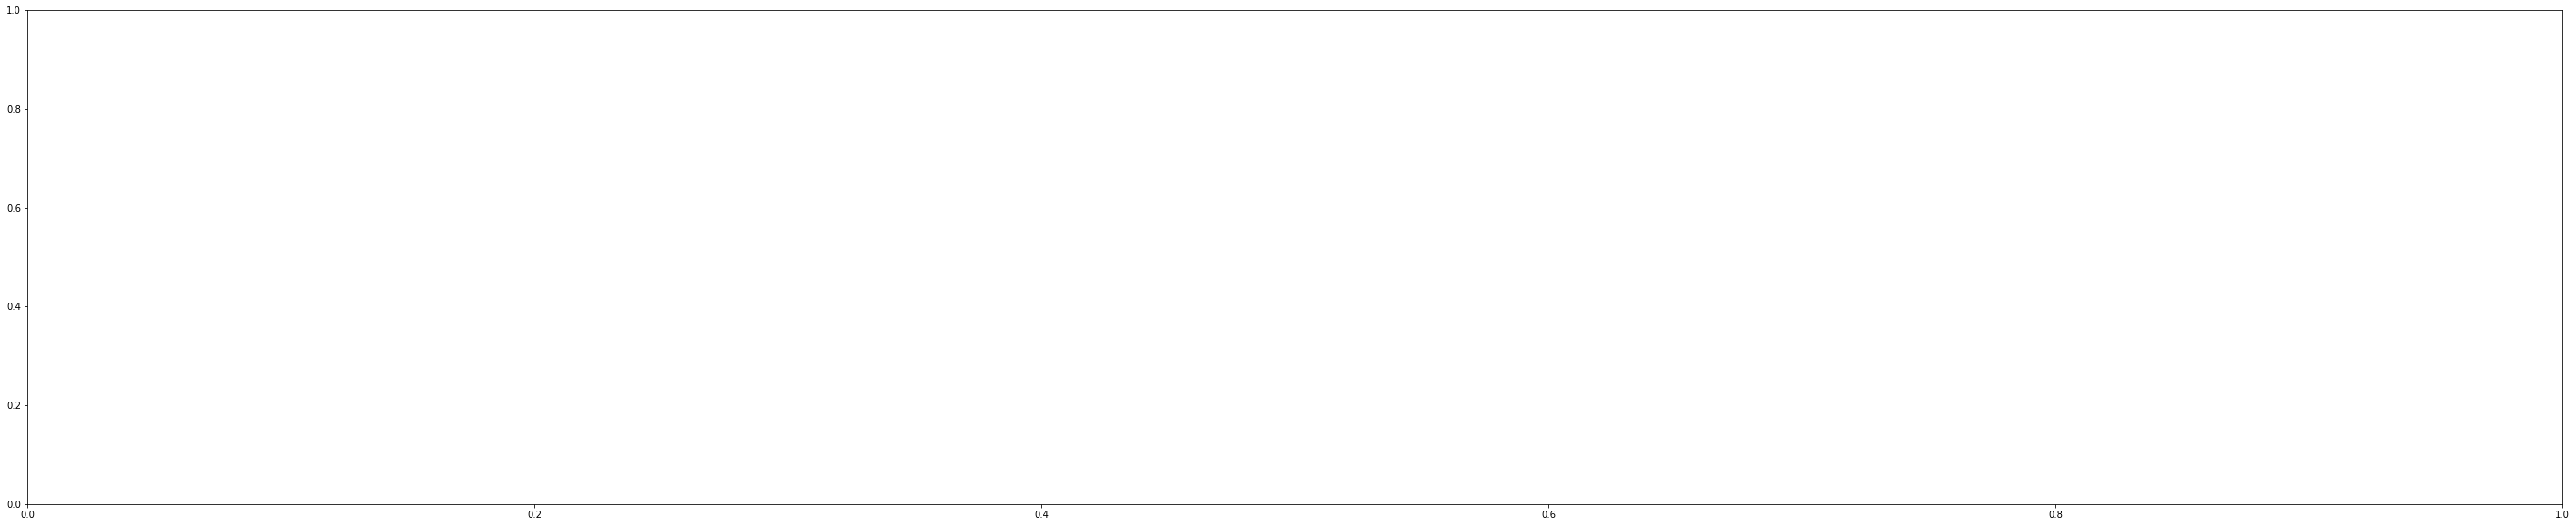

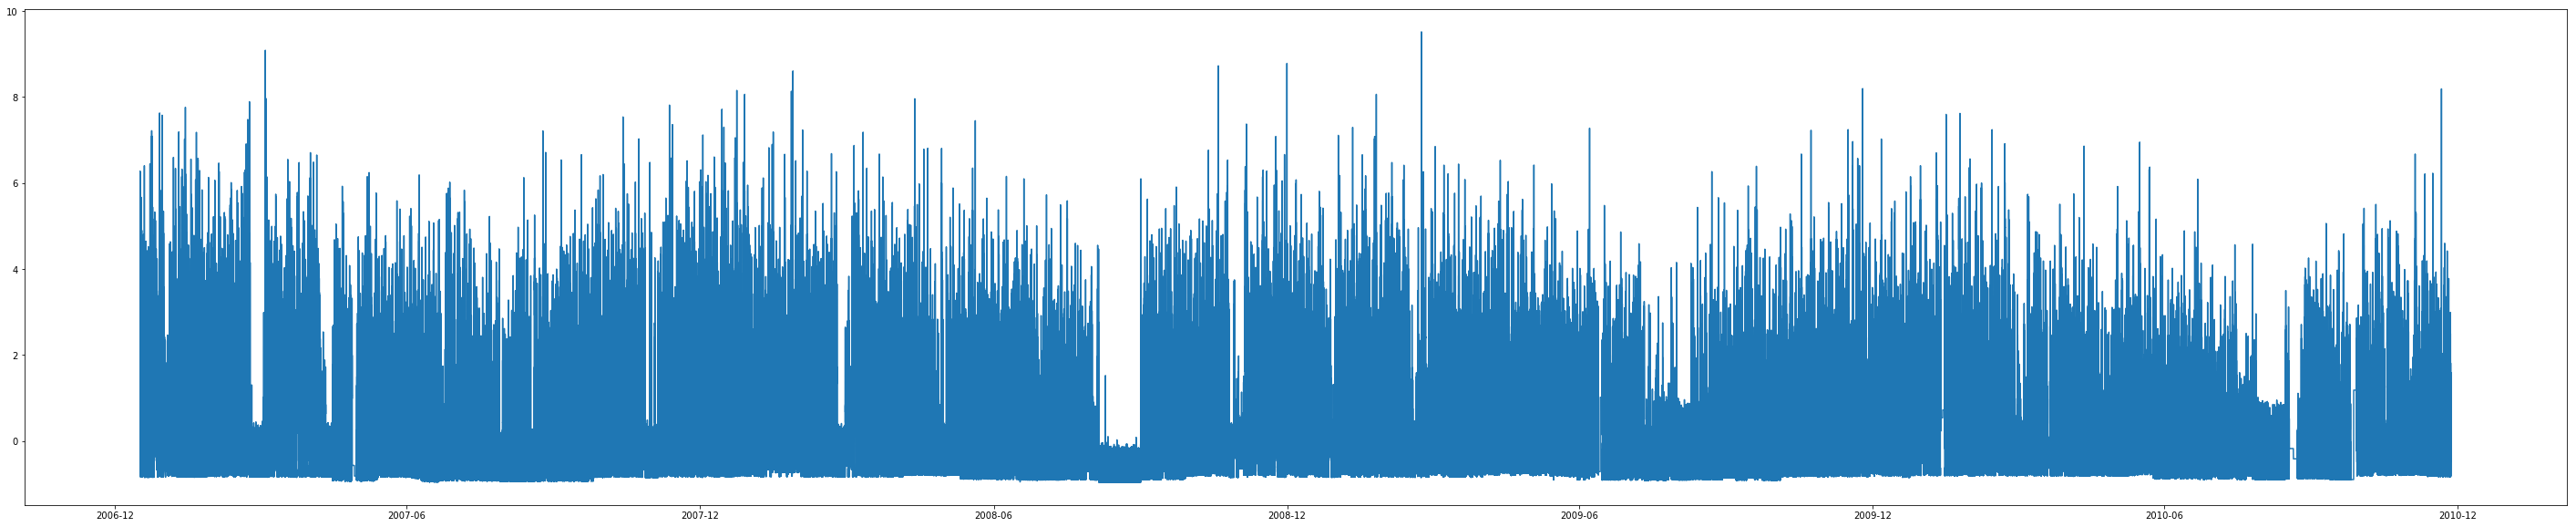

In [10]:
plt.figure(figsize=(50,10))
plt.plot(trueData['Global_active_power'])
plt.show()

**Test train split**

In [19]:
# This is the split in terms of data
df_train = trueData['2007': '2009']
df_test = trueData['2010':]

#Making the time slicers for clustering

k = -1
win = 120     #2 hours window, 50% overlap

ts_len = 6000  #small subset for testing purposes

ts_slices = []
dis_matrix = []
ts_data = trueData['Global_active_power']
step_size = int(win/2)
break_count = max((((ts_len/win)*1.5)/200), 5)

for z in range(0, ts_len-win, step_size):
    ts_slices.append(ts_data[z:z+win].values)
print("Done Slicing")
print(len(ts_slices))

X_train_scaled = ts_slices

Done Slicing
98


**k-Means Clustering**

In [ ]:
k_list = [i for i in range(2,24)] # As there are only 24 hours in a day the k values are only from 2 to 24
train_acc = {}
test_acc = {}
sse = {}

for no_clusters in k_list:
    kmeans = KMeans(n_clusters=no_clusters, random_state = 3)
    kmeans.fit(X_train_scaled)
    
    
    